In [146]:
# Importing data
import pandas as pd
df=pd.read_csv('Datasets/1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [147]:
# Preprocessing or Cleaning to have only numerical data
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df=df.apply(lambda x:lbl.fit_transform(x) if x.dtype=='object' else x)
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


<Axes: >

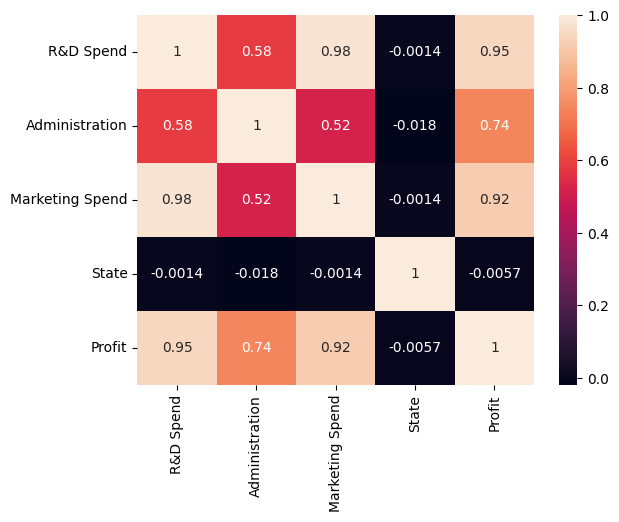

In [148]:
# Visualizing data using correlation matrix
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [149]:
# Splitting the data into independent and dependent variables

# x -> INDEPENDENT variable(s)
x=df.iloc[:,:-1]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


In [150]:
# y -> DEPENDENT variable
y=df.iloc[:,-1]
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [151]:
# Train-Test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [152]:
# Model Creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [153]:
# Model fitting
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Text(0.5, 0.98, 'Profit determination \n 1.Scatter plot of ytest and ypred.      2. Plot of xtest with (ytest and ypred)')

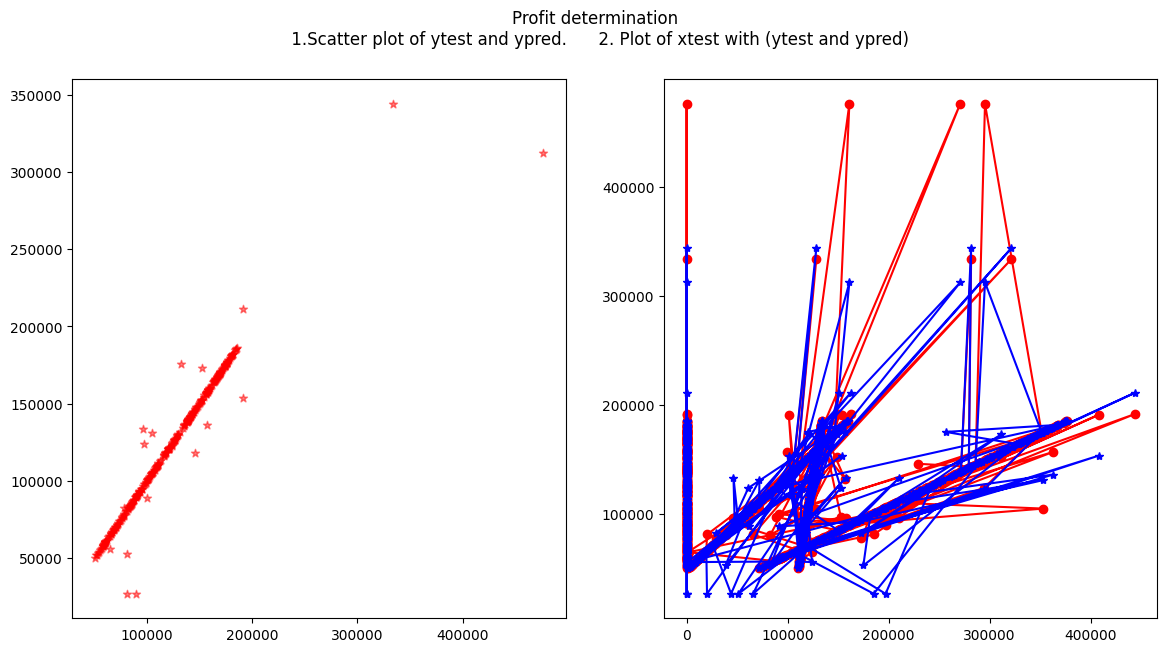

In [154]:
# Plotting graph
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
plt.scatter(ytest,ypred,marker='*',alpha=0.5,color='r')
plt.subplot(1,2,2)
plt.plot(xtest,ytest,'o-r')
plt.plot(xtest,ypred,'*-b')

plt.suptitle('Profit determination \n 1.Scatter plot of ytest and ypred.      2. Plot of xtest with (ytest and ypred)')

In [155]:
# Linear Regression line parameters
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [ 5.28077058e-01  9.78263293e-01  9.70601727e-02 -2.78834327e+02]
Intercept: -65740.27690882163


In [156]:
# Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error:",mean_squared_error(ytest,ypred))
print("Mean Absolute Error:",mean_absolute_error(ytest,ypred))
print("r2_score:",r2_score(ytest,ypred))
print("r2_score percentage:",r2_score(ytest,ypred)*100,"%")

Mean Squared Error: 143260233.70989308
Mean Absolute Error: 2310.220407225825
r2_score: 0.931091029778443
r2_score percentage: 93.1091029778443 %
